In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from cnn_model import build_model, train_model, save_cnn_model, load_cnn_model
from models.cnn_v1.cnn_normalize import get_cnn_data
from utils.chart import config_chart, plot_model_performance, plot_scatter_data, plot_distribution_data, plot_direction_comparison
from constants import SP500_TICKER, DJI_TICKER

---

## For **build_model** function

In [3]:
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 128)            512       
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 128)            49280     
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 1)                 769       
                                                                 
Total params: 50561 (197.50 KB)
Trainable params: 50561 (197.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---

## For **train_model** function

In [4]:
train, test, predict = get_cnn_data(DJI_TICKER)

x_train, y_train, dates_train = train.get_tensors()
x_test, y_test, dates_test = test.get_tensors()
x_predict, y_predict, dates_predict = predict.get_tensors()

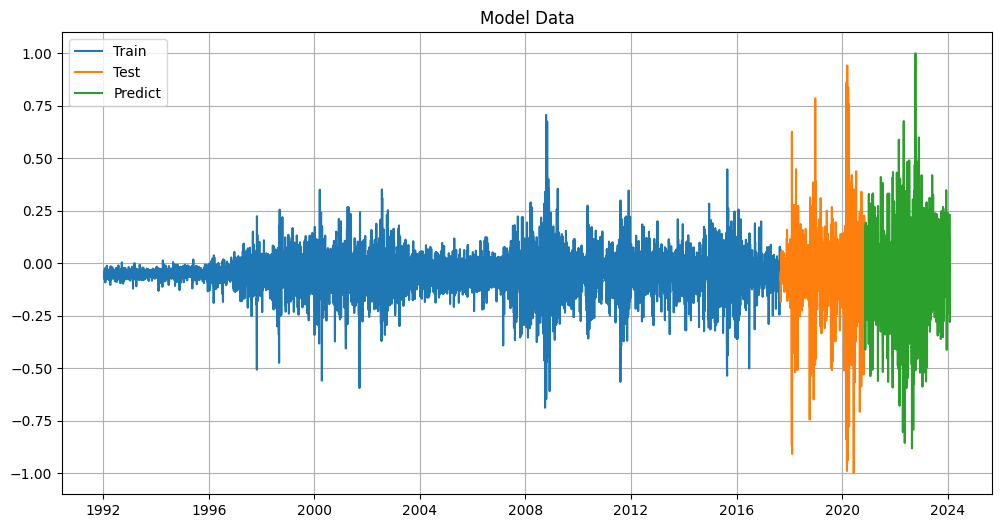

In [5]:
plt = config_chart('Model Data')
plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)
plt.plot(dates_predict, y_predict)
plt.legend(['Train', 'Test', 'Predict'])

Epoch 1/200


202/202 - 1s - loss: 0.0082 - mean_absolute_error: 0.0610 - accuracy: 0.0000e+00 - 1s/epoch - 6ms/step
Epoch 2/200
202/202 - 0s - loss: 0.0080 - mean_absolute_error: 0.0599 - accuracy: 0.0000e+00 - 388ms/epoch - 2ms/step
Epoch 3/200
202/202 - 0s - loss: 0.0079 - mean_absolute_error: 0.0601 - accuracy: 0.0000e+00 - 395ms/epoch - 2ms/step
Epoch 4/200
202/202 - 0s - loss: 0.0078 - mean_absolute_error: 0.0598 - accuracy: 0.0000e+00 - 425ms/epoch - 2ms/step
Epoch 5/200
202/202 - 0s - loss: 0.0077 - mean_absolute_error: 0.0593 - accuracy: 0.0000e+00 - 430ms/epoch - 2ms/step
Epoch 6/200
202/202 - 0s - loss: 0.0077 - mean_absolute_error: 0.0594 - accuracy: 0.0000e+00 - 431ms/epoch - 2ms/step
Epoch 7/200
202/202 - 0s - loss: 0.0076 - mean_absolute_error: 0.0592 - accuracy: 0.0000e+00 - 373ms/epoch - 2ms/step
Epoch 8/200
202/202 - 0s - loss: 0.0076 - mean_absolute_error: 0.0591 - accuracy: 0.0000e+00 - 388ms/epoch - 2ms/step
Epoch 9/200
202/202 - 0s - loss: 0.0075 - mean_absolute_e

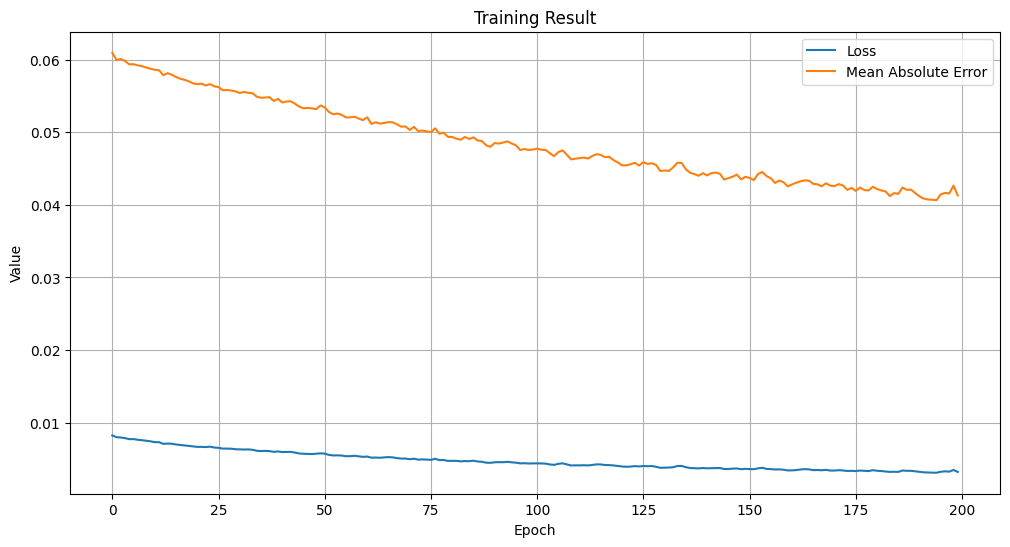

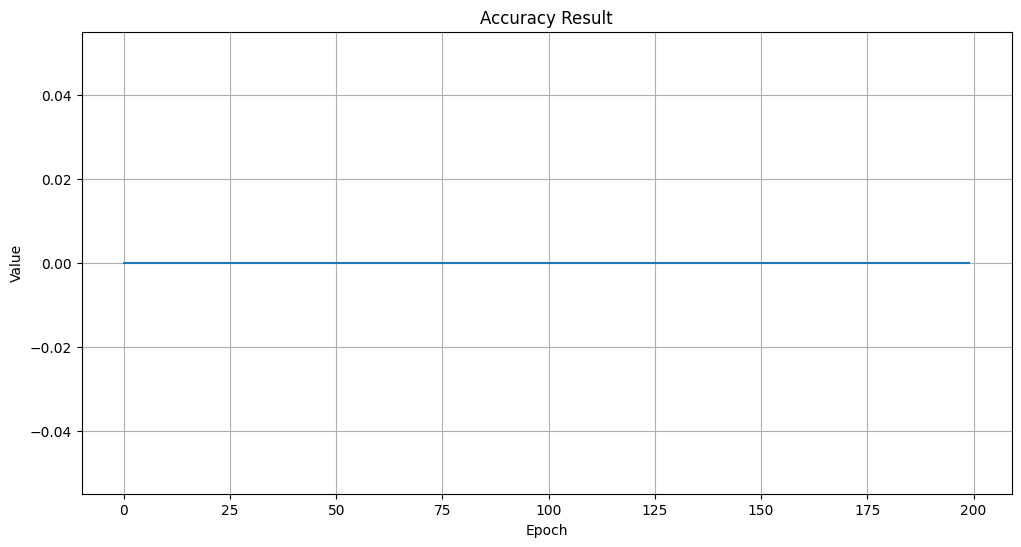

INFO:tensorflow:Assets written to: ./models/cnn_v1/cnn_model_v1\assets


INFO:tensorflow:Assets written to: ./models/cnn_v1/cnn_model_v1\assets


In [6]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test)
plot_model_performance(fit_result)
save_cnn_model(model)

In [7]:
model = load_cnn_model()

26/26 [==============================] - 0s 1ms/step


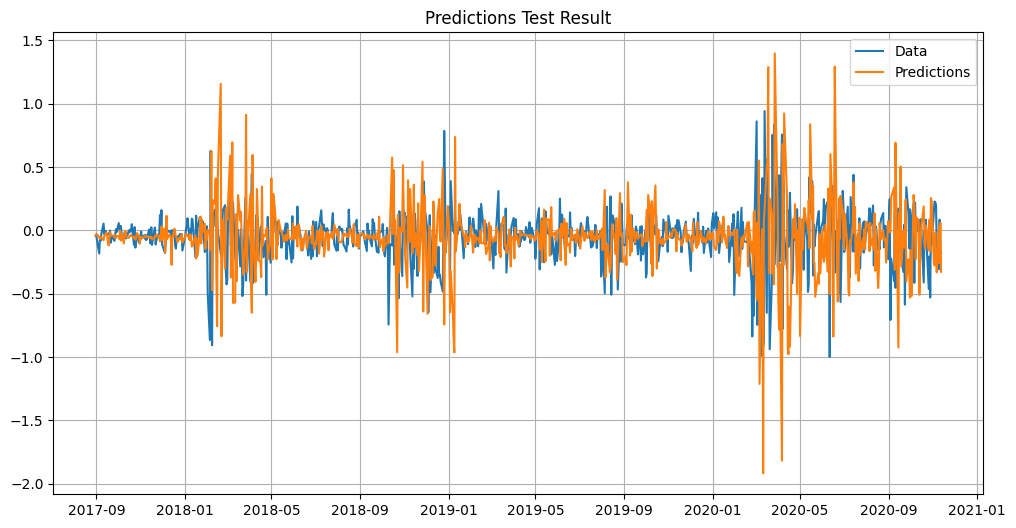

In [8]:
predictions = model.predict(x_test)

plt = config_chart('Predictions Test Result')
plt.plot(dates_test, y_test)
plt.plot(dates_test, predictions)
plt.legend(['Data', 'Predictions'])

26/26 [==============================] - 0s 1ms/step


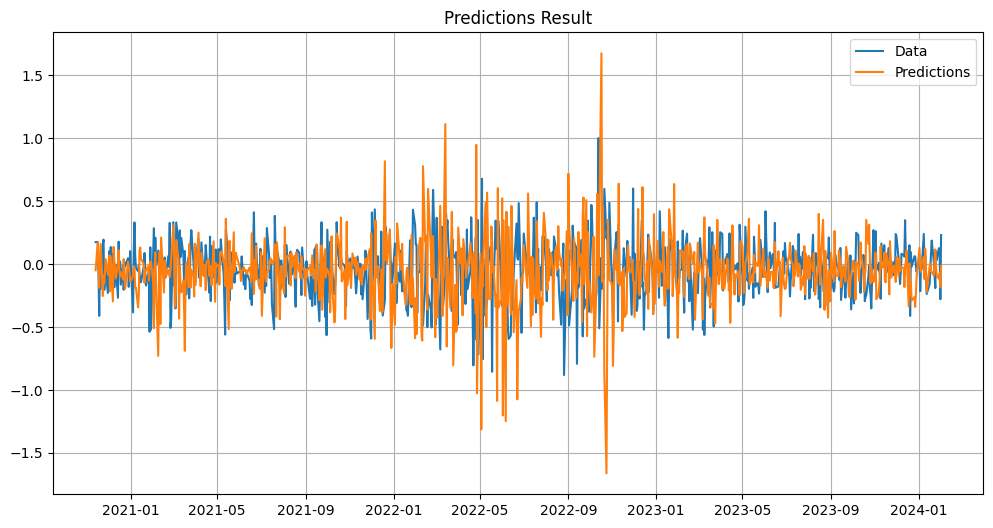

In [9]:
predictions = model.predict(x_predict)

plt = config_chart('Predictions Result')
plt.plot(dates_predict, y_predict)
plt.plot(dates_predict, predictions)
plt.legend(['Data', 'Predictions'])

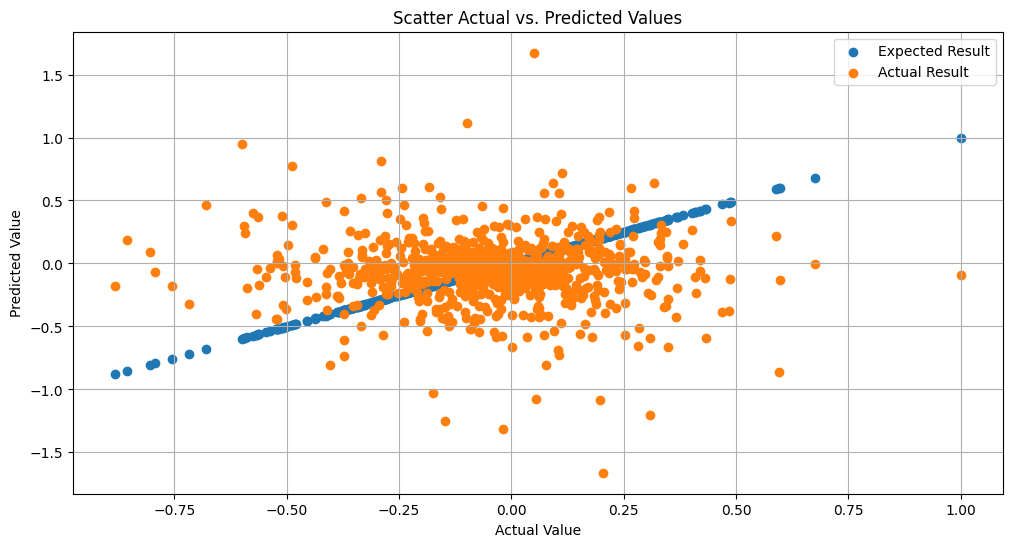

In [10]:
plot_scatter_data(y_predict, predictions)

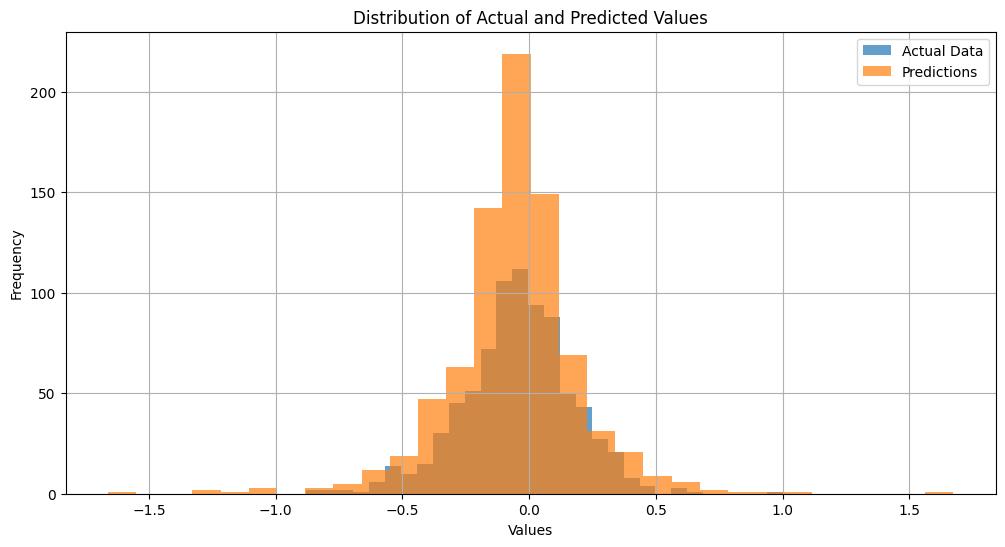

In [11]:
plot_distribution_data(y_predict, predictions)

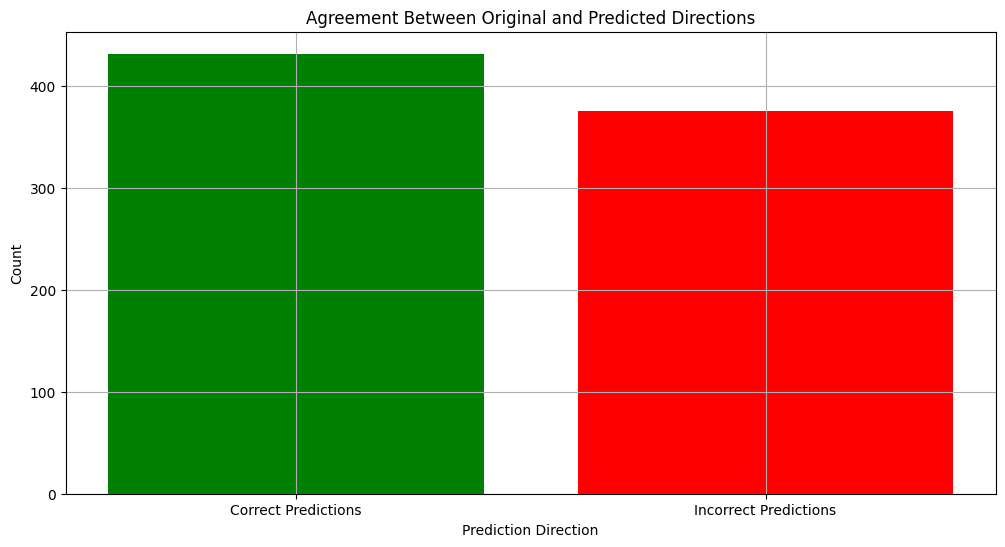

In [12]:
plot_direction_comparison(y_predict, predictions)